# Eigenvalue experiment
- Seeing how the algorithm converges to eigenvalues 
- We take a 2-qubit unitary and try to run both the **original** method and the **modified** method with resolution = 30, error = 2.
- We want to know how the algorithms converge to same eigenvalues or not as we perform many experiments

In [12]:
from qiskit import *
import matplotlib.pyplot as plt
import random
from scipy.stats import unitary_group
import os
import seaborn as sns
import numpy as np

In [13]:
from normal_SPEA import SPEA
from changed_SPEA import global_max_SPEA

### Defining the unitary matrix

In [14]:
unit = unitary_group.rvs(4)
unit

array([[-0.08662962-0.14966553j, -0.20577556-0.42805425j,
         0.01787568-0.02127795j,  0.74919118+0.42715548j],
       [-0.13629453+0.10058922j, -0.83456263+0.15729546j,
        -0.01154898+0.03277954j, -0.34126951+0.3638629j ],
       [-0.03787673+0.45066333j,  0.03371059-0.1198995j ,
         0.69758896+0.54071145j,  0.02980956-0.00823321j],
       [-0.45375694+0.72867942j,  0.15365205-0.11860899j,
        -0.19214567-0.42673252j,  0.01508434+0.07877656j]])

### Generate the eigenvalues

In [15]:
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print("Eigenvalues :", eig_v)
print("Eigenstates :", eig_vect)

Eigenvalues : [0.70850459 0.48248318 0.22172288 0.08319081]
Eigenstates : [[ 0.71847094+0.j          0.12268873+0.27567193j  0.28335766-0.4632161j
  -0.06361628-0.30634003j]
 [ 0.05596118+0.17471691j  0.92806066+0.j          0.04080457+0.29413325j
   0.10692214+0.07371584j]
 [-0.14202013-0.10489435j  0.0603245 +0.02131117j -0.14573811-0.40219684j
   0.88415629+0.j        ]
 [-0.48598302-0.42753925j  0.1099417 +0.1774133j   0.65875489+0.j
  -0.0319776 -0.32013664j]]


### Generate the basis we provide

In [16]:
sample = unitary_group.rvs(4)
basis = []
for k in sample:
    basis.append(k)
basis_ind = np.random.choice(range(4))
print("Basis :", basis)
print("Basis index :", basis_ind)

Basis : [array([-0.01964614+0.15135189j, -0.06454395-0.56074709j,
        0.55645771-0.32681038j,  0.39225222+0.29629612j]), array([ 0.16338673-0.57138985j,  0.0143074 -0.43178181j,
       -0.02765176-0.3224286j , -0.59560811-0.0265392j ]), array([-0.62831029-0.40585865j, -0.02059642+0.05858896j,
        0.36759384+0.07222771j,  0.14128748-0.52568415j]), array([-0.07198256+0.24258707j, -0.1548799 -0.6833095j ,
       -0.31937367+0.48629554j,  0.00529016-0.3264345j ])]
Basis index : 2


### Utils

In [26]:
def generate_plot1(actual_E, returned_E, iters):
    colors = ['blue', 'orange', 'red',
              'green', 'brown', 'magenta', 'pink']

    plt.figure(figsize=(9, 7))
    plt.scatter(range(iters), returned_E, marker='o', edgecolors='grey', color=np.random.choice(colors),
                alpha=0.8,)
    for i, k in enumerate(actual_E):
        if i == 0:
            plt.plot([0, iters], [k, k], color='black',
                     linewidth=2, label='Actual Values')
        else:
            plt.plot([0, iters], [k, k], color='black',
                     linewidth=2)
    plt.xlabel("Number of iterations", fontsize=14)
    plt.ylabel("Eigenvalues", fontsize=14)
    plt.title("Scatter plot for returned eigenvalues", fontsize=17)
    plt.legend()
    plt.grid()

In [18]:
def generate_plot2(actual_E, returned_E, size, experiments):
    colors = ['blue', 'orange', 'red',
              'green', 'brown', 'magenta', 'pink']

    fig = plt.figure(figsize=(16, 13))
    for i in range(size):
        ax = fig.add_subplot(size/2, 2, i+1)

        ax.scatter(range(experiments), returned_E[i], marker='o', edgecolors='grey', color=np.random.choice(colors),
                   alpha=0.8,)
        for i, k in enumerate(actual_E):
            if i == 0:
                ax.plot([0, experiments], [k, k], color='black',
                        linewidth=2, label='Actual Values')
            else:
                ax.plot([0, experiments], [k, k], color='black',
                        linewidth=2)
        ax.set_xlabel("Experiment Number", fontsize=14)
        ax.set_ylabel("Eigenvalues", fontsize=14)
        ax.set_title("Scatter plot for returned eigenvalues", fontsize=17)
        ax.legend(loc='best')
        ax.grid()

## Keeping  everything constant and running the algorithm
- Let us try to test the new parameters of *theta_min* and *theta_max* to constrain the values
- The basis vectors provided are the same and generated before hand

### Non-computational basis
- Giving a fixed non-computational basis state for the testing of the algorithm

- Algorithm 1

In [29]:
simulator = Aer.get_backend('qasm_simulator')


In [33]:
spea2 = global_max_SPEA(unit, resolution=15, error=2, max_iters=80)
res = spea2.get_eigen_pair(progress = True,
        backend=simulator, algo='alternate', basis=basis,
        basis_ind=basis_ind)

Right : 0.4642857142857143
Left : 0
ITERATION NUMBER 1 ...
100.000000 %completedBest Phi is : [-0.49684948-0.36339762j  0.06896497+0.06028044j  0.42622691+0.06496534j
  0.14372294-0.63729641j]
Theta estimate : 0.16581632653061226
Current cost : 0.884765625

COST : 0.884765625
THETA : 0.16581632653061226
Right : 0.2908163265306123
Left : 0.04081632653061226
ITERATION NUMBER 2 ...
100.000000 %completedBest Phi is : [-0.41846267-0.33454224j  0.11526607+0.06012689j  0.44989651+0.05998103j
  0.14250956-0.68538705j]
Theta estimate : 0.16581632653061226
Current cost : 0.900390625

COST : 0.900390625
THETA : 0.16581632653061226
Right : 0.22831632653061226
Left : 0.10331632653061226
ITERATION NUMBER 3 ...
100.000000 %completedBest Phi is : [-0.40020728-0.38953033j  0.11611659+0.01703308j  0.44494023+0.0277269j
  0.08277179-0.68464246j]
Theta estimate : 0.16581632653061226
Current cost : 0.912109375

COST : 0.912109375
THETA : 0.16581632653061226
Right : 0.19706632653061226
Left : 0.134566326530

100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.1416812818877551
ITERATION NUMBER 43 ...
100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.1416812818877551
ITERATION NUMBER 44 ...
100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.1416812818877551
ITERATION NUMBER 45 ...
100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.1416812818877551
ITERATION NUMBER 46 ...
100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.1416812818877551
ITERATION NUMBER 47 ...
100.000000 %completed
No change, updating a...

COST : 0.966796875
THETA : 0.1426578443877551
Right : 0.1436344068877551
Left : 0.141681281887755

In [24]:
eigen_vals_ret1 = []
for i in range(30):
    spea2 = global_max_SPEA(unit, resolution=40, error=2, max_iters=i)
    res = spea2.get_eigen_pair(
        backend=simulator, algo='alternate', basis=basis,
        basis_ind=basis_ind)
#     if res['cost'] < 0.75:
#         continue

    eigen_vals_ret1.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algor

In [28]:
eigen_vals_ret1 

[0.16177679158448388,
 0.14535050953320183,
 0.16082655325443784,
 0.6773311657626563,
 0.15376397107166337,
 0.14770299145299143,
 0.15301276914858644,
 0.1665844838921762,
 0.6793542745315582,
 0.6647934772559171,
 0.16022559171597633,
 0.1498652651935404,
 0.16323039940828404,
 0.15561821992110453,
 0.18020627876397108,
 0.14575115055884286]

In [ ]:
[0.70850459 0.48248318 0.22172288 0.08319081]

ValueError: x and y must be the same size

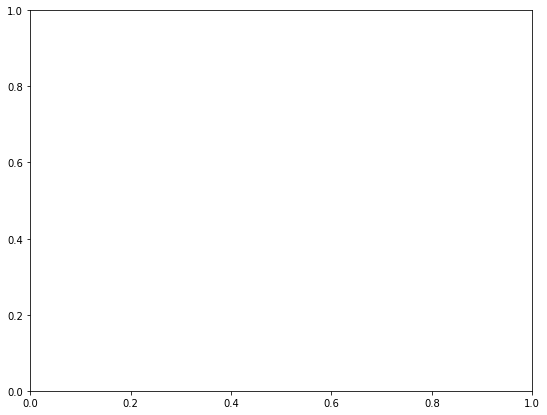

In [27]:
generate_plot1(eig_v, eigen_vals_ret1, )

- Algorithm 2

In [150]:
spea2 = global_max_SPEA(unit, resolution=40, error=2, max_iters=15)
simulator = Aer.get_backend('qasm_simulator')

In [151]:
eigen_vals_ret2 = []
while len(eigen_vals_ret2) != 100:
    res = spea2.get_eigen_pair(
        backend=simulator, algo='alternate', basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue
    print(res)
    eigen_vals_ret2.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.9296875, 'theta': 0.43369391025641024, 'state': array([ 0.21820735+0.32401787j, -0.55965138+0.09410322j,
        0.40720212+0.31416847j, -0.14899223+0.24320683j,
        0.17659898+0.04992835j, -0.04495746-0.16614357j,
        0.18480251-0.26682467j, -0.06859972+0.07817319j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.908203125, 'theta': 0.38902243589743585, 'state': array([ 0.177834  +0.13085468j, -0.398723  +0.00311875j,
        0.37530032+0.1928559j , -0.32852735+0.19091918j,
        0.17450589+0.14436368j,  0.51365788-0.15534033j,
        0.09236655-0.28686843j, -0.16300046+0.11478605j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.908203125, 'theta': 0.4018429487179487, 'state': array([ 0.17481018+0.20369536j, -0.38667287+0.15604242j,
        0.35623593+0.18775203j, -0.36543241+0.17612668j,
        0.19999359+0.15321801j

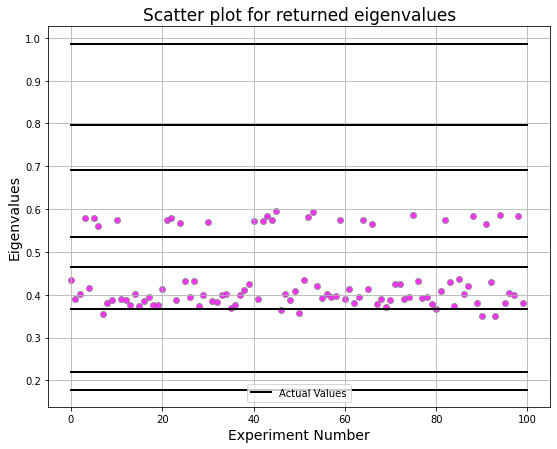

In [152]:
generate_plot1(eig_v, eigen_vals_ret2, 100)

### Computational basis
- Testing the algorithm for computational basis by specifying different basis indices
- Aim is to see whether each basis index **converges to different states** or not
- Can we infer that one of the predictions is almost always centered around the minimum eigenvalue of the matrix ?

In [ ]:
unit = unitary_group.rvs(4)
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print(eig_v)

In [43]:

y = np.array([[0,-1j],
            [1j,0]])
yy= np.kron(y,y)
basis = []
for k in yy:
    basis.append(k)

In [44]:
basis  

[array([ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j]),
 array([0.+0.j, 0.+0.j, 1.-0.j, 0.-0.j]),
 array([0.+0.j, 1.-0.j, 0.+0.j, 0.-0.j]),
 array([-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])]

In [45]:
eig_ret = []

spea1 = SPEA(unit, resolution=30, error=2, max_iters=10)
simulator = Aer.get_backend('qasm_simulator')

for i in range(4):
    basis_index = i
    eigen_vals_ret1 = []
    while len(eigen_vals_ret1) != 15:
        res = spea1.get_eigen_pair(
            backend=simulator, algo='alternate', basis=basis, basis_ind=basis_index)
        if res['cost'] < 0.75:
            continue
        print((len(eigen_vals_ret1)/15)*100, "% done...")
        eigen_vals_ret1.append(res['theta'])
    eig_ret.append(eigen_vals_ret1)

Maximum iterations reached for the estimation.
Terminating algorithm...
0.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
6.666666666666667 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
13.333333333333334 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
20.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
26.666666666666668 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
33.33333333333333 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
40.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
46.666666666666664 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
53.333333333333336 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
60.0 % done...
Maximum iterations reached for the estimation.
Te

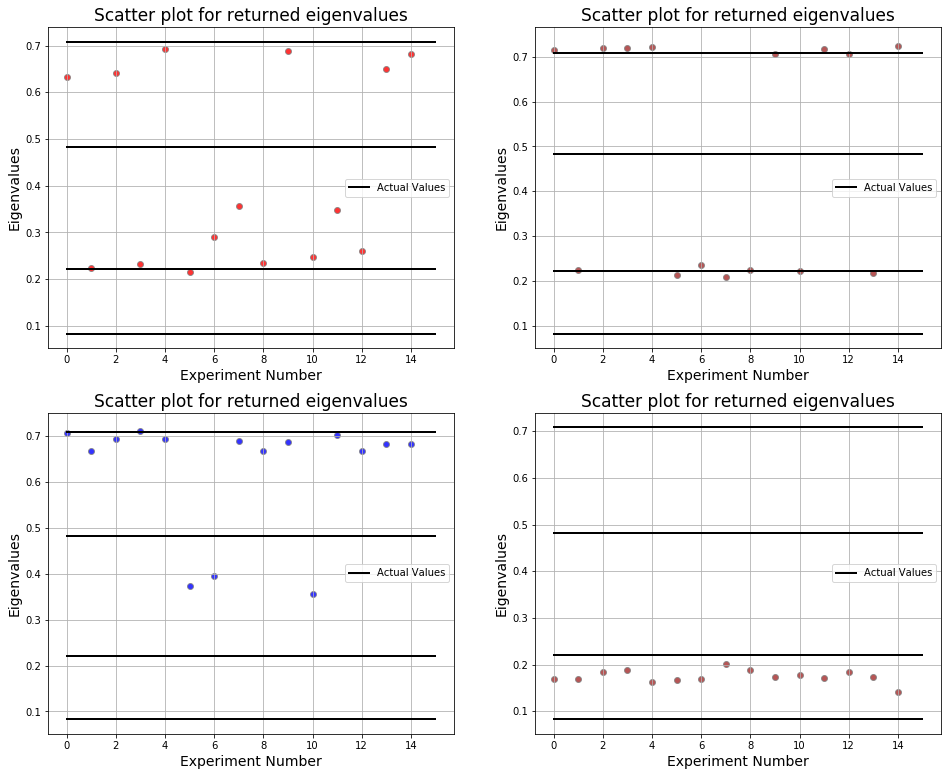

In [42]:
generate_plot2(eig_v, eig_ret, 4, 15)

In [90]:
eig_ret2 = []

spea2 = global_max_SPEA(unit, resolution=30, error=2, max_iters=10)
simulator = Aer.get_backend('qasm_simulator')

for i in range(4):
    basis_index = i
    eigen_vals_ret2 = []
    while len(eigen_vals_ret2) != 40:
        res = spea2.get_eigen_pair(
            backend=simulator, algo='alternate', basis=basis, basis_ind=basis_index)
        if res['cost'] < 0.75:
            continue
        print((len(eigen_vals_ret2)/40)*100, "% done...")
        eigen_vals_ret2.append(res['theta'])
    eig_ret2.append(eigen_vals_ret2)

Maximum iterations reached for the estimation.
Terminating algorithm...
0.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
2.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
5.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
7.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
10.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
12.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
15.0 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
17.5 % done...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations r

<ipython-input-70-77b4d686abd1>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(size/2,2,i+1)


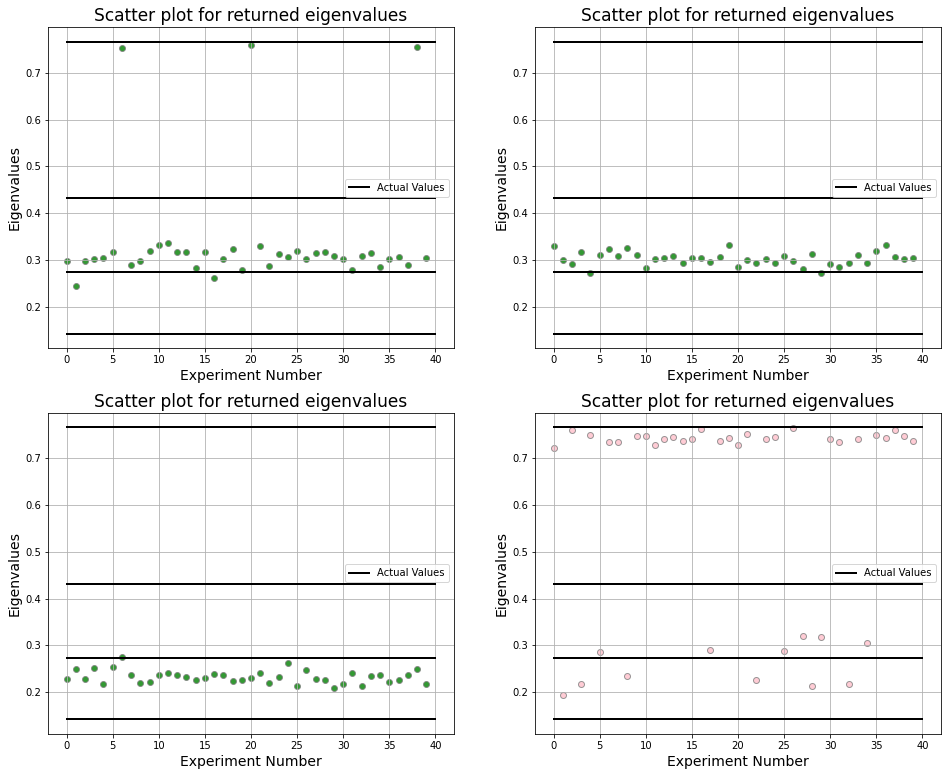

In [91]:
generate_plot2(eig_v, eig_ret2, 4, 40)

- **Distribution plots**
- These plots show us which eigenvalues our results are closest to

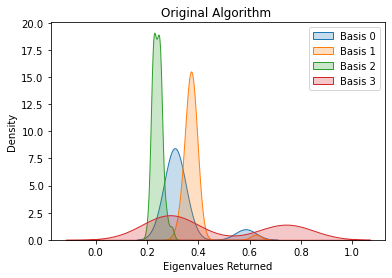

In [123]:
plt.title("Original Algorithm ")
for i in range(4):
    sns.kdeplot(eig_ret[i], shade=True, label='Basis '+str(i))
plt.xlabel("Eigenvalues Returned")
plt.legend()

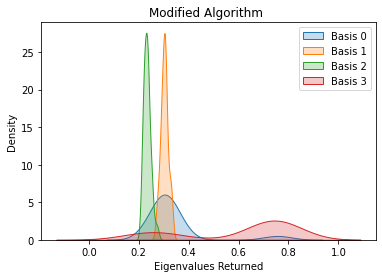

In [128]:
plt.title("Modified Algorithm ")
for i in range(4):
    sns.kdeplot(eig_ret2[i], shade=True, label='Basis '+str(i), palette='red')
plt.xlabel("Eigenvalues Returned")
plt.legend()

## Inference
- Now that we have done larger number of experiments, it seems to be that the basis states aren't very good in determining the min eigval region.
<font color = 'orange'>
- One inference that I got is that **if the basis state and the computational basis is specified as constant, the algorithm converges to the same eigenvalue every time**
</font>
<font color = 'green'>
- Next steps are to discover a **way to see if we can generate such basis states which are actually closer to the eigenvector associated with the minimum eigenvalue**
</font>




## Build Min Eigensolver - Approach 1
- Provide a step size to use
- Provide a minimum threshold to use
- If the threshold is met, we return the eigenvalues discovered, else we continue our search.
- Each step uses **experiments** number of experiments and tries to evaluate eigenvalues using the SPEA method

In [11]:
def min_eigensolver(unitary, algo, experiments=20, min_threshold=0.9):

    dims = unitary.shape[0]
    simulator = Aer.get_backend('qasm_simulator')
    step_size = (1/dims)

    # generate the steps
    steps = np.arange(0, 1 + 1e-12, step_size)
    if steps[-1] != 1:
        steps = np.append(steps, 1)
    print("Steps :", steps)
    if algo == 0:
        spe = SPEA(unitary, resolution=40, error=2, max_iters=12)
    else:
        spe = global_max_SPEA(unitary, resolution=40, error=2, max_iters=12)
    # start the experiments

    max_cost = -1
    for i in range(len(steps) - 1):
        # define left and right bounds
        left = steps[i]
        right = steps[i+1]
        
        costs, eigs = [], []  # lists to store costs
        for _ in range(experiments):
            res = spe.get_eigen_pair(
                backend=simulator, theta_left=left, theta_right=right,
                randomize=True)
            costs.append(res['cost'])
            eigs.append(res['theta'])
        
        # if the cost is above threshold, return them
        if np.average(costs) > min_threshold:
            return (np.average(costs), eigs)
        if np.average(costs) > max_cost:
            max_cost = np.average(costs)
            best_eigs = eigs

    # return the cost with the max average cost
    return (max_cost, best_eigs)

In [24]:
unit = unitary_group.rvs(4)
unit 

array([[-0.73737466+0.08923416j, -0.50550121+0.22319599j,
         0.03327247+0.22981948j, -0.0337806 -0.29648402j],
       [ 0.18541684-0.3030763j , -0.21341786-0.12616057j,
         0.46067544-0.10833265j, -0.73096463-0.23245334j],
       [ 0.27560144+0.47868375j, -0.61297999-0.42258658j,
        -0.30588642+0.01230079j, -0.12700966+0.17530709j],
       [-0.10509646+0.0770823j , -0.01442761-0.28045742j,
         0.66131652+0.43710499j,  0.19036625+0.48939648j]])

In [25]:
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print("Eigenvalues :", eig_v)
print("Eigenstates :", eig_vect)

Eigenvalues : [0.14742747 0.33002076 0.53756144 0.7158465 ]
Eigenstates : [[ 0.01668685-0.25374176j  0.44439848+0.21364809j  0.82087212+0.j
  -0.1338175 -0.02151704j]
 [-0.45293829+0.13841667j  0.07336284-0.40803535j  0.22458654+0.36012688j
   0.65090883+0.j        ]
 [ 0.32728374-0.08557429j  0.61629812+0.j         -0.33045284-0.03627131j
   0.31056331-0.54660293j]
 [ 0.77239031+0.j         -0.0844143 -0.44501728j  0.18543275+0.03374137j
   0.18536906+0.35827584j]]


In [31]:
res1 = min_eigensolver(unit, algo=0, experiments=40, min_threshold=0.85)
res2 = min_eigensolver(unit, algo=1, experiments=40, min_threshold=0.85)

Steps : [0.   0.25 0.5  0.75 1.  ]
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached fo

In [32]:
res1[1], res2[1]

([0.25,
  0.22265625,
  0.25,
  0.22189349112426035,
  0.25,
  0.24248798076923075,
  0.21465113412228798,
  0.25,
  0.25,
  0.1794781907462196,
  0.22559428418803418,
  0.25,
  0.25,
  0.2487479967948718,
  0.25,
  0.1959385016025641,
  0.2344802966798159,
  0.23432427781886916,
  0.25,
  0.21594551282051283,
  0.25,
  0.25,
  0.25,
  0.21937150723208415,
  0.2421647812041673,
  0.25,
  0.25,
  0.19025440705128205,
  0.25,
  0.25,
  0.25,
  0.25,
  0.18684895833333331,
  0.25,
  0.2318709935897436,
  0.21626653928336617,
  0.25,
  0.2288405037804076,
  0.25,
  0.19085151627218935],
 [0.19355207113432774,
  0.25,
  0.22859700520833334,
  0.25,
  0.25,
  0.25,
  0.25,
  0.18968811637080868,
  0.25,
  0.24102646252412802,
  0.25,
  0.18677704840565418,
  0.25,
  0.2270069611378205,
  0.25,
  0.24879807692307693,
  0.1905561348848493,
  0.1804637419871795,
  0.16168818828073636,
  0.25,
  0.25,
  0.2449637368507561,
  0.25,
  0.19606794008974515,
  0.2159765947672752,
  0.2395708133012820

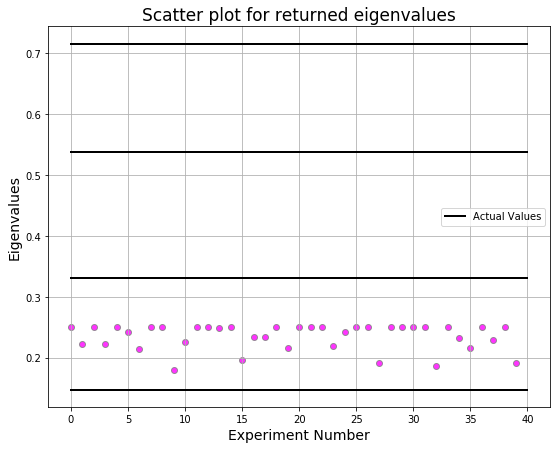

In [33]:
generate_plot1(eig_v,res1[1],40)

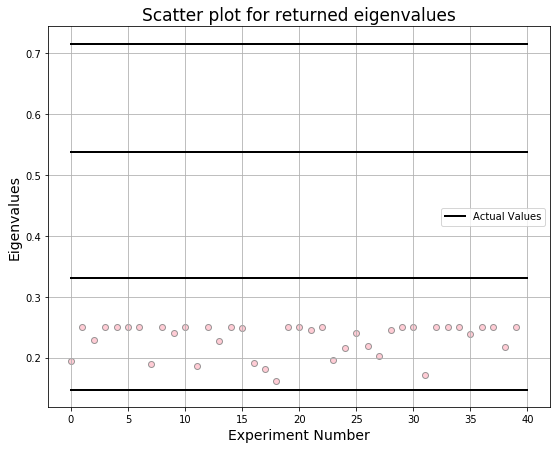

In [34]:
generate_plot1(eig_v,res2[1],40)

## <font color = 'grey'>Limitation</font>
- Even if we constraint our angles between a left and a right bound, we do not ensure that the basis vector that we have sampled is actually having an overlap with an eigenvector with the eigenvalue in **that range**.
- This limitation is not present in the algorithm with the **modified cost function** approach
